In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
!pip install contractions


In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import PunktSentenceTokenizer
from textblob import TextBlob
import string
# import fasttext
import contractions
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [124]:
df = pd.read_csv('/content/drive/MyDrive/MLProj/joke_text.csv')
df.head()

,Joke Number,Text
0,1,"A man visits the doctor. The doctor says ""I ha..."
1,2,"Two cannibals are eating a clown, one turns to..."
2,3,Q: Whats the difference between greeting a Que...
3,4,"Q. What do a hurricane, a tornado, and a redne..."
4,5,A guy stood over his tee shot for what seemed ...


In [125]:
print(df.shape)

(100, 2)


In [126]:
for col in df.columns: # no columns have null values
    print(col, df[col].isnull().sum())

Joke Number 0
Text 0


In [127]:
df['no_contract'] = df['Text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df.head()

,Joke Number,Text,no_contract
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha..."


In [128]:
# df.head()

In [129]:
df['no_contract_strings'] = [' '.join(map(str, l)) for l in df['no_contract']]
df.head()

,Joke Number,Text,no_contract,no_contract_strings
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...


In [130]:
df['tokenized'] = df['no_contract_strings'].apply(word_tokenize)
df.head()

,Joke Number,Text,no_contract,no_contract_strings,tokenized
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor, ., The, doctor, ..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown, ,, one..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...,"[Q, :, What, Is, the, difference, between, gre..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne...","[Q, ., What, do, a, hurricane, ,, a, tornado, ..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha..."


In [131]:
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])
df.head()

,Joke Number,Text,no_contract,no_contract_strings,tokenized,lower
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor, ., The, doctor, ...","[a, man, visits, the, doctor, ., the, doctor, ..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, ,, one..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...,"[Q, :, What, Is, the, difference, between, gre...","[q, :, what, is, the, difference, between, gre..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne...","[Q, ., What, do, a, hurricane, ,, a, tornado, ...","[q, ., what, do, a, hurricane, ,, a, tornado, ..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha..."


In [132]:
punc = string.punctuation
df['no_punc'] = df['lower'].apply(lambda x: [word for word in x if word.isalnum()])
df.head()

,Joke Number,Text,no_contract,no_contract_strings,tokenized,lower,no_punc
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor, ., The, doctor, ...","[a, man, visits, the, doctor, ., the, doctor, ...","[a, man, visits, the, doctor, the, doctor, say..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, one, t..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...,"[Q, :, What, Is, the, difference, between, gre...","[q, :, what, is, the, difference, between, gre...","[q, what, is, the, difference, between, greeti..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne...","[Q, ., What, do, a, hurricane, ,, a, tornado, ...","[q, ., what, do, a, hurricane, ,, a, tornado, ...","[q, what, do, a, hurricane, a, tornado, and, a..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha..."


In [133]:
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,Joke Number,Text,no_contract,no_contract_strings,tokenized,lower,no_punc,stopwords_removed
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor, ., The, doctor, ...","[a, man, visits, the, doctor, ., the, doctor, ...","[a, man, visits, the, doctor, the, doctor, say...","[man, visits, doctor, doctor, says, bad, news,..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, one, t...","[two, cannibals, eating, clown, one, turns, sa..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...,"[Q, :, What, Is, the, difference, between, gre...","[q, :, what, is, the, difference, between, gre...","[q, what, is, the, difference, between, greeti...","[q, difference, greeting, queen, greeting, pre..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne...","[Q, ., What, do, a, hurricane, ,, a, tornado, ...","[q, ., what, do, a, hurricane, ,, a, tornado, ...","[q, what, do, a, hurricane, a, tornado, and, a...","[q, hurricane, tornado, redneck, divorce, comm..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[guy, stood, tee, shot, seemed, eternity, look..."


In [134]:
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

,Joke Number,Text,no_contract,no_contract_strings,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor, ., The, doctor, ...","[a, man, visits, the, doctor, ., the, doctor, ...","[a, man, visits, the, doctor, the, doctor, say...","[man, visits, doctor, doctor, says, bad, news,...","[(man, NN), (visits, NNS), (doctor, VBP), (doc..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, one, t...","[two, cannibals, eating, clown, one, turns, sa...","[(two, CD), (cannibals, NNS), (eating, VBG), (..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...,"[Q, :, What, Is, the, difference, between, gre...","[q, :, what, is, the, difference, between, gre...","[q, what, is, the, difference, between, greeti...","[q, difference, greeting, queen, greeting, pre...","[(q, NN), (difference, NN), (greeting, VBG), (..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne...","[Q, ., What, do, a, hurricane, ,, a, tornado, ...","[q, ., what, do, a, hurricane, ,, a, tornado, ...","[q, what, do, a, hurricane, a, tornado, and, a...","[q, hurricane, tornado, redneck, divorce, comm...","[(q, RB), (hurricane, NN), (tornado, NN), (red..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[guy, stood, tee, shot, seemed, eternity, look...","[(guy, NN), (stood, VBD), (tee, NN), (shot, NN..."


In [135]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [136]:
df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

,Joke Number,Text,no_contract,no_contract_strings,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor, ., The, doctor, ...","[a, man, visits, the, doctor, ., the, doctor, ...","[a, man, visits, the, doctor, the, doctor, say...","[man, visits, doctor, doctor, says, bad, news,...","[(man, NN), (visits, NNS), (doctor, VBP), (doc...","[(man, n), (visits, n), (doctor, v), (doctor, ..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, one, t...","[two, cannibals, eating, clown, one, turns, sa...","[(two, CD), (cannibals, NNS), (eating, VBG), (...","[(two, n), (cannibals, n), (eating, v), (clown..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...,"[Q, :, What, Is, the, difference, between, gre...","[q, :, what, is, the, difference, between, gre...","[q, what, is, the, difference, between, greeti...","[q, difference, greeting, queen, greeting, pre...","[(q, NN), (difference, NN), (greeting, VBG), (...","[(q, n), (difference, n), (greeting, v), (quee..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne...","[Q, ., What, do, a, hurricane, ,, a, tornado, ...","[q, ., what, do, a, hurricane, ,, a, tornado, ...","[q, what, do, a, hurricane, a, tornado, and, a...","[q, hurricane, tornado, redneck, divorce, comm...","[(q, RB), (hurricane, NN), (tornado, NN), (red...","[(q, r), (hurricane, n), (tornado, n), (rednec..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[guy, stood, tee, shot, seemed, eternity, look...","[(guy, NN), (stood, VBD), (tee, NN), (shot, NN...","[(guy, n), (stood, v), (tee, n), (shot, n), (s..."


In [137]:
wnl = WordNetLemmatizer()
df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df.head()

,Joke Number,Text,no_contract,no_contract_strings,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor, ., The, doctor, ...","[a, man, visits, the, doctor, ., the, doctor, ...","[a, man, visits, the, doctor, the, doctor, say...","[man, visits, doctor, doctor, says, bad, news,...","[(man, NN), (visits, NNS), (doctor, VBP), (doc...","[(man, n), (visits, n), (doctor, v), (doctor, ...","[man, visit, doctor, doctor, say, bad, news, c..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, one, t...","[two, cannibals, eating, clown, one, turns, sa...","[(two, CD), (cannibals, NNS), (eating, VBG), (...","[(two, n), (cannibals, n), (eating, v), (clown...","[two, cannibal, eat, clown, one, turn, say, ta..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...,"[Q, :, What, Is, the, difference, between, gre...","[q, :, what, is, the, difference, between, gre...","[q, what, is, the, difference, between, greeti...","[q, difference, greeting, queen, greeting, pre...","[(q, NN), (difference, NN), (greeting, VBG), (...","[(q, n), (difference, n), (greeting, v), (quee...","[q, difference, greet, queen, greet, president..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne...","[Q, ., What, do, a, hurricane, ,, a, tornado, ...","[q, ., what, do, a, hurricane, ,, a, tornado, ...","[q, what, do, a, hurricane, a, tornado, and, a...","[q, hurricane, tornado, redneck, divorce, comm...","[(q, RB), (hurricane, NN), (tornado, NN), (red...","[(q, r), (hurricane, n), (tornado, n), (rednec...","[q, hurricane, tornado, redneck, divorce, comm..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[guy, stood, tee, shot, seemed, eternity, look...","[(guy, NN), (stood, VBD), (tee, NN), (shot, NN...","[(guy, n), (stood, v), (tee, n), (shot, n), (s...","[guy, stand, tee, shot, seem, eternity, look, ..."


In [138]:
df.to_csv('cleant_data_1sttry.csv')

In [139]:
df = df[['Joke Number','lemmatized']]

In [140]:
df.head()

,Joke Number,lemmatized
0,1,"[man, visit, doctor, doctor, say, bad, news, c..."
1,2,"[two, cannibal, eat, clown, one, turn, say, ta..."
2,3,"[q, difference, greet, queen, greet, president..."
3,4,"[q, hurricane, tornado, redneck, divorce, comm..."
4,5,"[guy, stand, tee, shot, seem, eternity, look, ..."


In [141]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head()

<ipython-input-141-ec676e7b7969>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]


,Joke Number,lemmatized,lemma_str
0,1,"[man, visit, doctor, doctor, say, bad, news, c...",man visit doctor doctor say bad news cancer al...
1,2,"[two, cannibal, eat, clown, one, turn, say, ta...",two cannibal eat clown one turn say taste funny
2,3,"[q, difference, greet, queen, greet, president...",q difference greet queen greet president unite...
3,4,"[q, hurricane, tornado, redneck, divorce, comm...",q hurricane tornado redneck divorce common som...
4,5,"[guy, stand, tee, shot, seem, eternity, look, ...",guy stand tee shot seem eternity look look mea...


In [142]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,Joke Number,lemmatized,lemma_str,sentiment
0,1,"[man, visit, doctor, doctor, say, bad, news, c...",man visit doctor doctor say bad news cancer al...,-0.700000
1,2,"[two, cannibal, eat, clown, one, turn, say, ta...",two cannibal eat clown one turn say taste funny,0.250000
2,3,"[q, difference, greet, queen, greet, president...",q difference greet queen greet president unite...,0.000000
3,4,"[q, hurricane, tornado, redneck, divorce, comm...",q hurricane tornado redneck divorce common som...,-0.300000
4,5,"[guy, stand, tee, shot, seem, eternity, look, ...",guy stand tee shot seem eternity look look mea...,0.316667


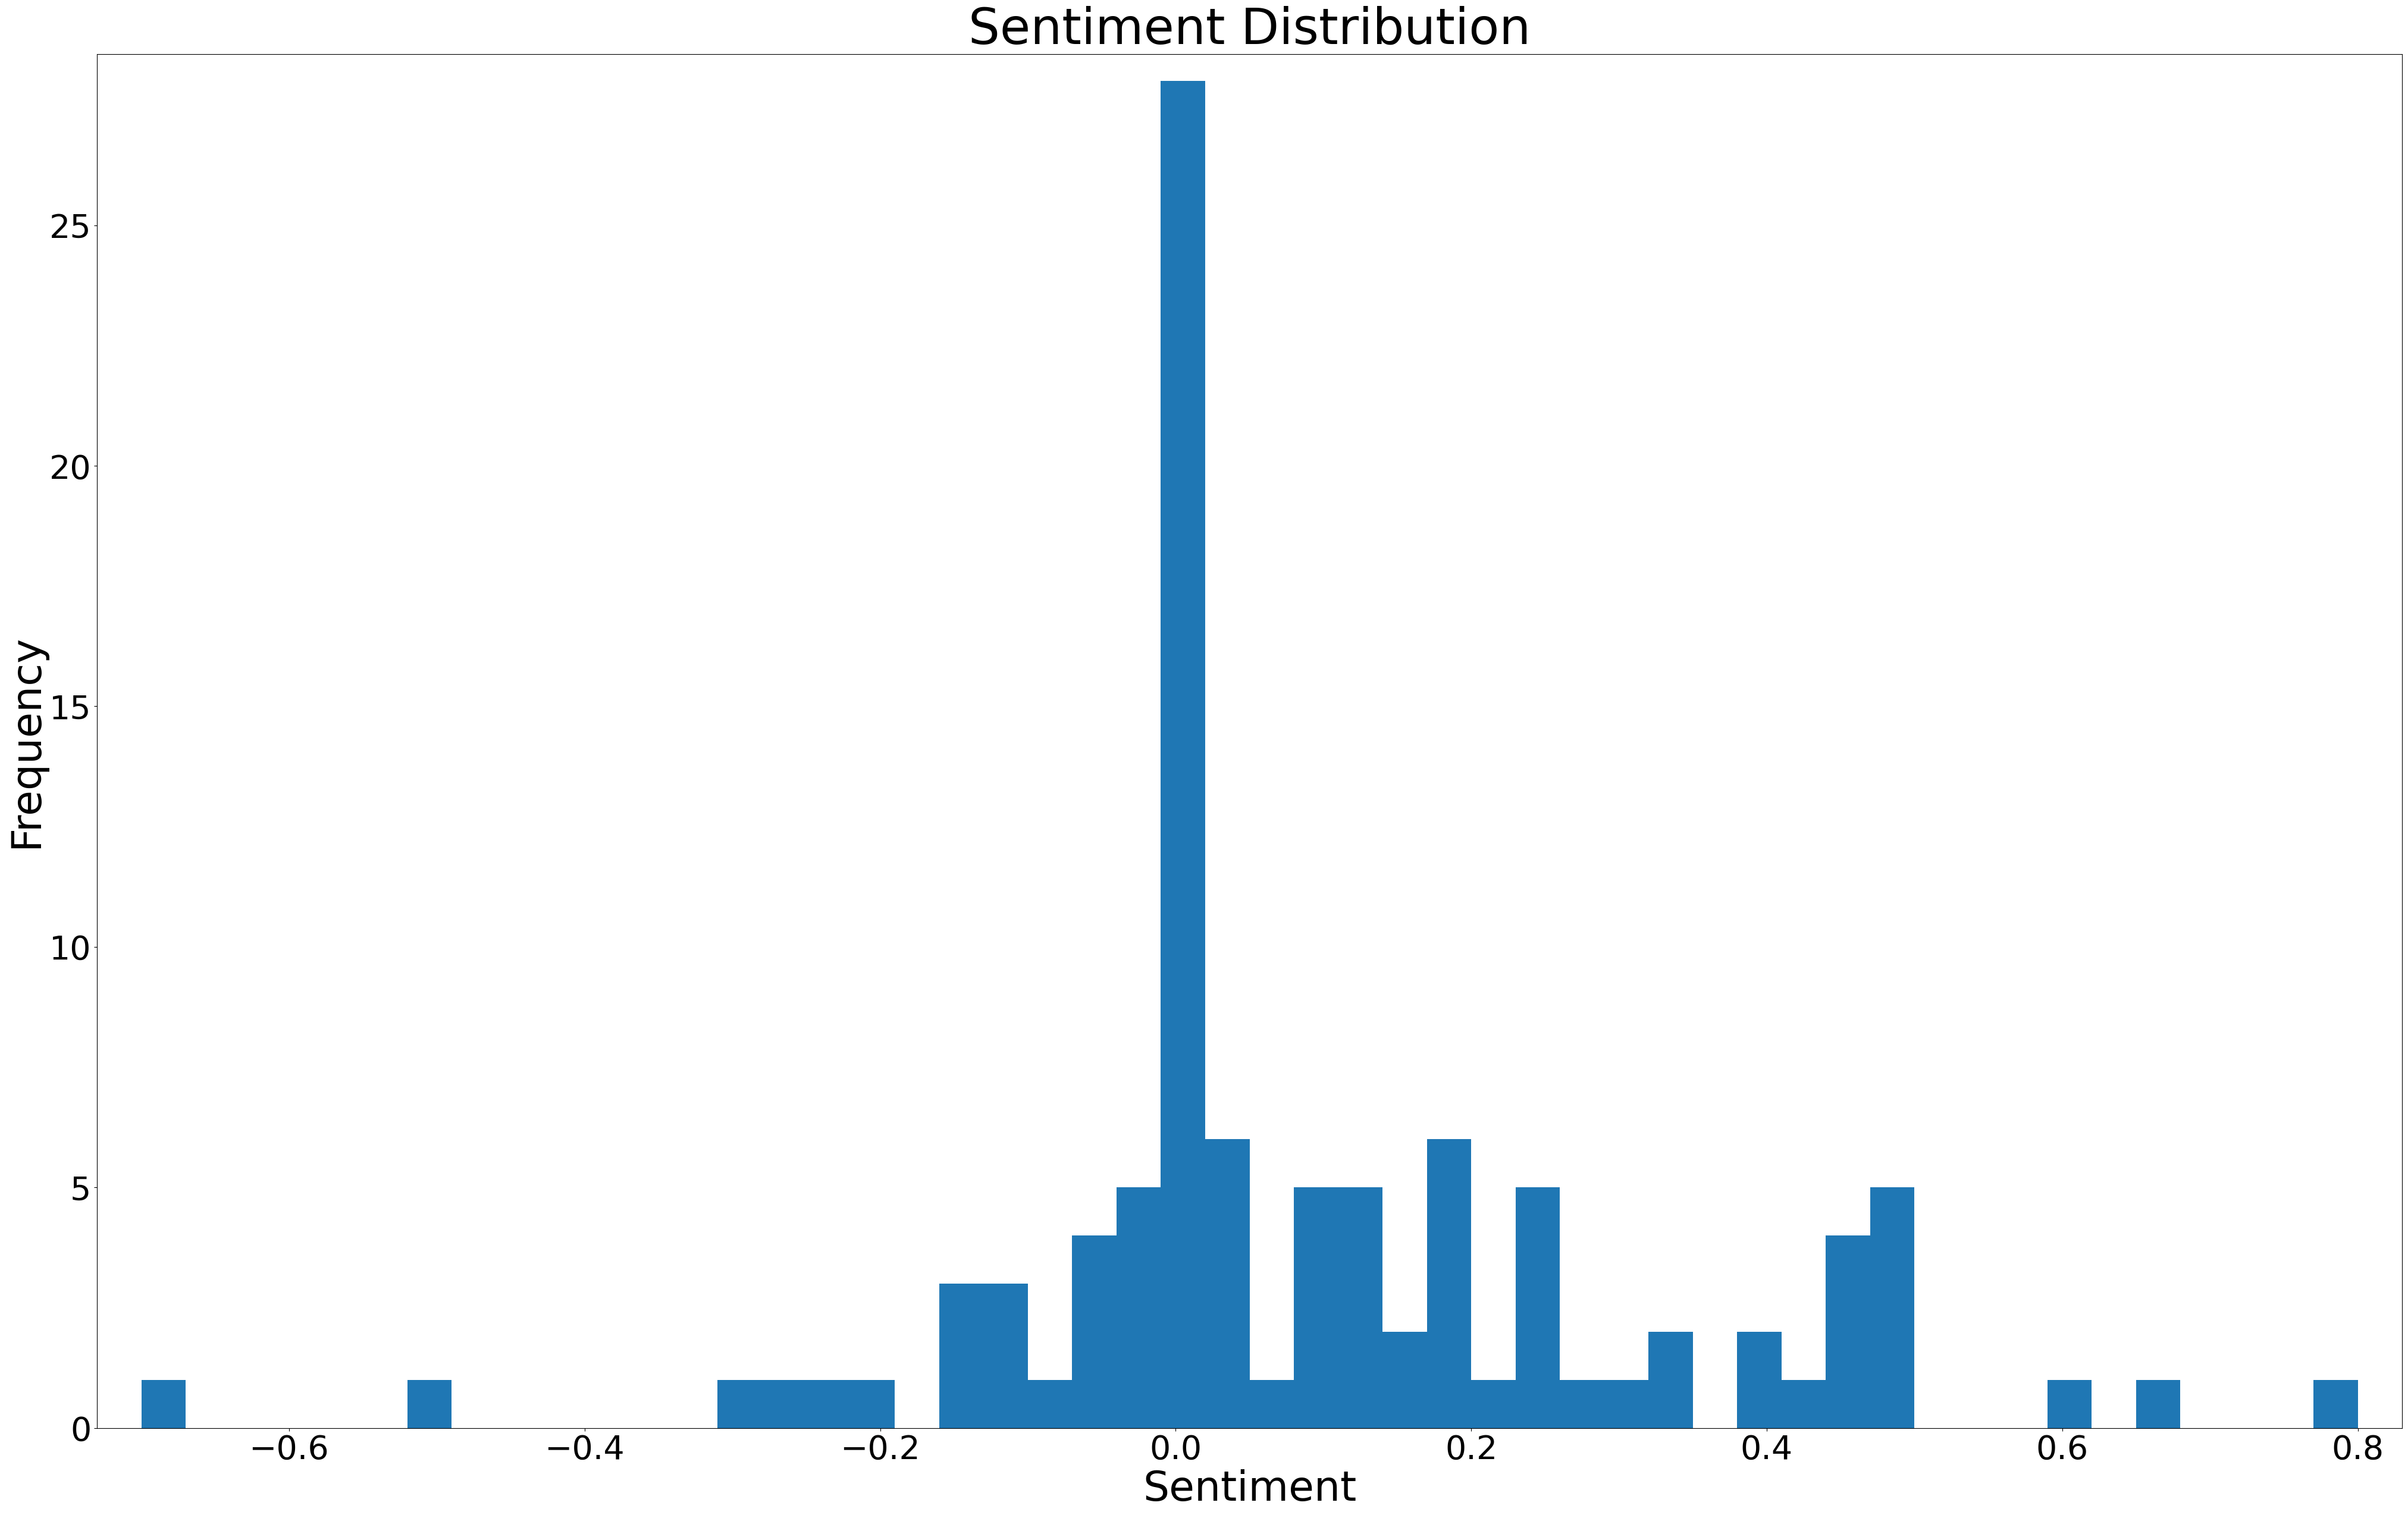

In [143]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

In [144]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df.head()

,Joke Number,lemmatized,lemma_str,sentiment,word_count
0,1,"[man, visit, doctor, doctor, say, bad, news, c...",man visit doctor doctor say bad news cancer al...,-0.700000,16
1,2,"[two, cannibal, eat, clown, one, turn, say, ta...",two cannibal eat clown one turn say taste funny,0.250000,9
2,3,"[q, difference, greet, queen, greet, president...",q difference greet queen greet president unite...,0.000000,13
3,4,"[q, hurricane, tornado, redneck, divorce, comm...",q hurricane tornado redneck divorce common som...,-0.300000,10
4,5,"[guy, stand, tee, shot, seem, eternity, look, ...",guy stand tee shot seem eternity look look mea...,0.316667,44


In [145]:
print(type(df['lemma_str'][0]))

<class 'str'>


In [146]:
# df.drop(['review_len'], axis = 1)
df['joke_len'] = df['lemma_str'].astype(str).apply(len)
df.head()

,Joke Number,lemmatized,lemma_str,sentiment,word_count,joke_len
0,1,"[man, visit, doctor, doctor, say, bad, news, c...",man visit doctor doctor say bad news cancer al...,-0.700000,16,93
1,2,"[two, cannibal, eat, clown, one, turn, say, ta...",two cannibal eat clown one turn say taste funny,0.250000,9,47
2,3,"[q, difference, greet, queen, greet, president...",q difference greet queen greet president unite...,0.000000,13,78
3,4,"[q, hurricane, tornado, redneck, divorce, comm...",q hurricane tornado redneck divorce common som...,-0.300000,10,66
4,5,"[guy, stand, tee, shot, seem, eternity, look, ...",guy stand tee shot seem eternity look look mea...,0.316667,44,268


In [147]:
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist

In [148]:
print(allwords)

['man', 'visit', 'doctor', 'doctor', 'say', 'bad', 'news', 'cancer', 'alzheimer', 'disease', 'man', 'reply', 'well', 'thank', 'god', 'cancer', 'two', 'cannibal', 'eat', 'clown', 'one', 'turn', 'say', 'taste', 'funny', 'q', 'difference', 'greet', 'queen', 'greet', 'president', 'united', 'state', 'get', 'one', 'knee', 'greet', 'queen', 'q', 'hurricane', 'tornado', 'redneck', 'divorce', 'common', 'someone', 'go', 'lose', 'trailer', 'guy', 'stand', 'tee', 'shot', 'seem', 'eternity', 'look', 'look', 'measure', 'distance', 'figure', 'wind', 'direction', 'speed', 'drive', 'partner', 'nut', 'finally', 'exasperate', 'partner', 'say', 'hell', 'take', 'long', 'hit', 'goddamn', 'ball', 'guy', 'answer', 'wife', 'watch', 'clubhouse', 'want', 'make', 'perfect', 'shot', 'well', 'hell', 'man', 'stand', 'snowball', 'chance', 'hell', 'hit', 'ask', 'japanese', 'visitor', 'election', 'country', 'every', 'morning', 'answer', 'father', 'anxious', 'marry', 'daughter', 'want', 'impress', 'date', 'like', 'screw

In [149]:
mostcommon = FreqDist(allwords).most_common(100)

Text(0.5, 1.0, 'Top 100 Most Common Words')

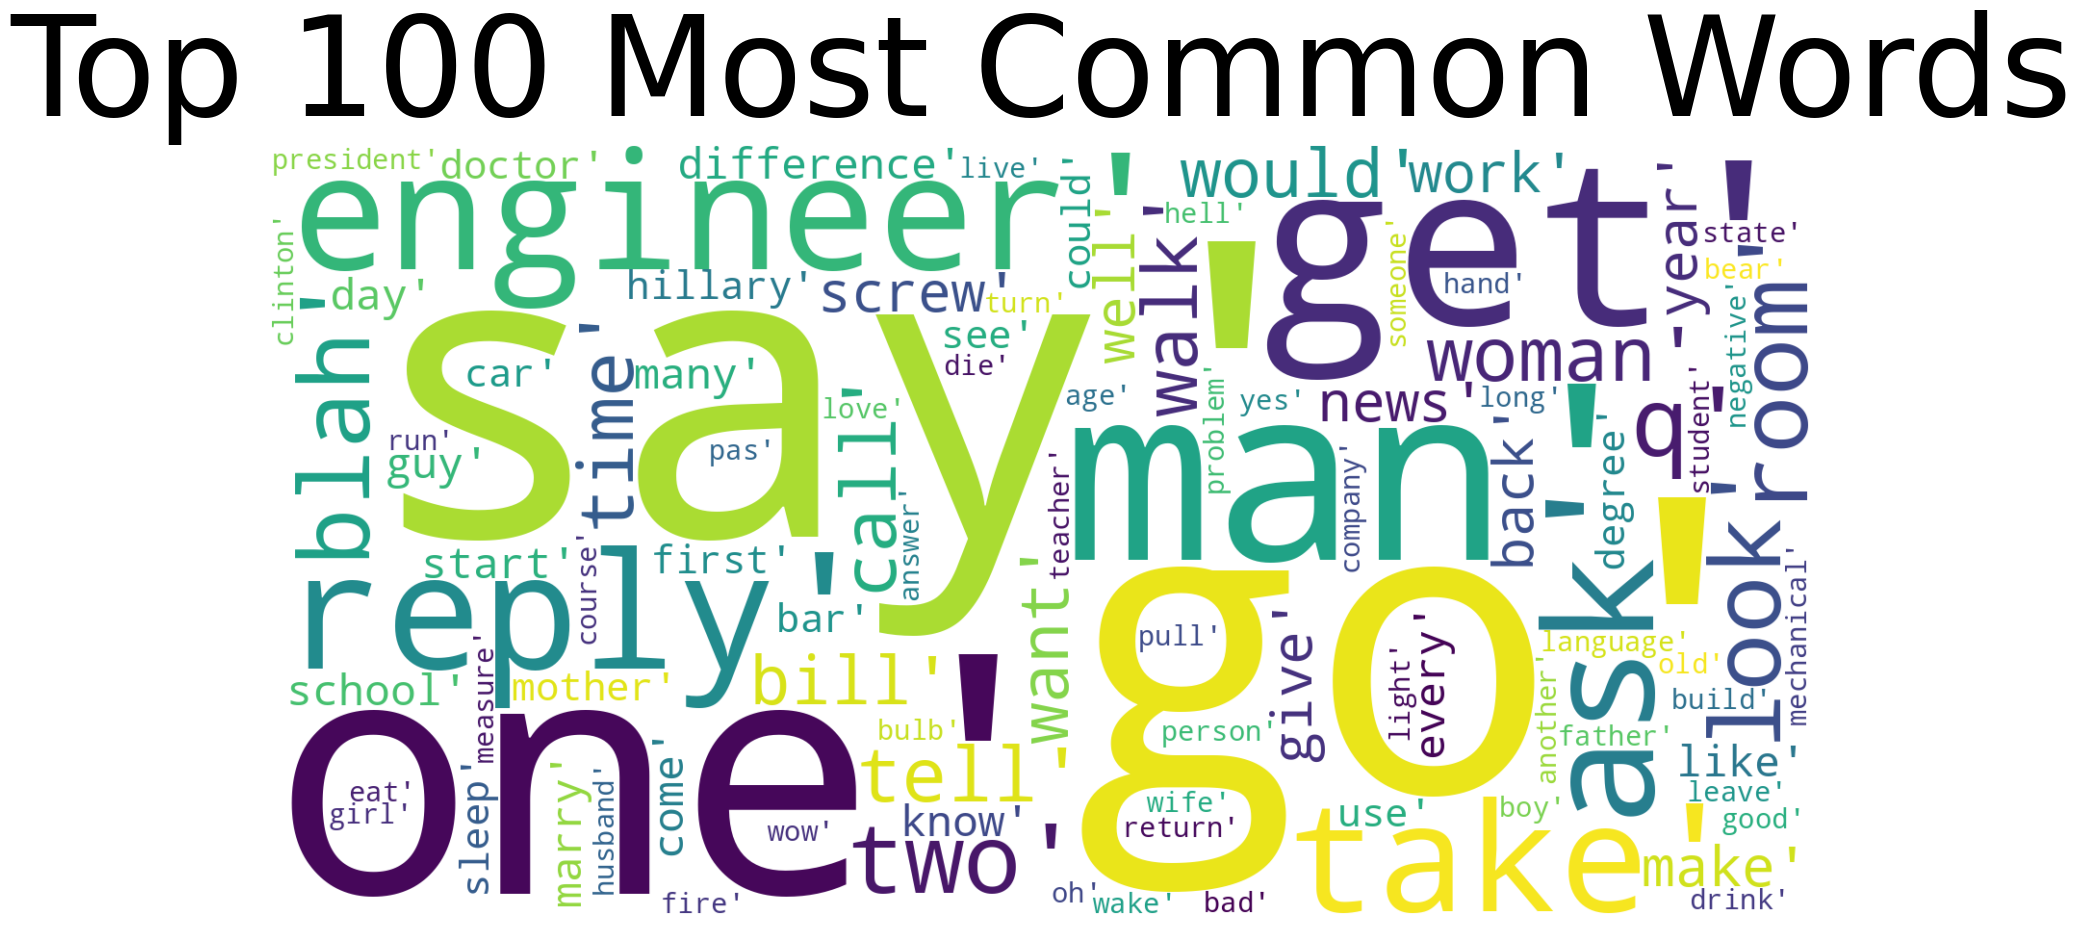

In [150]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)

In [151]:
plt.tight_layout(pad=0)
plt.show()

<Figure size 640x480 with 0 Axes>

In [152]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)

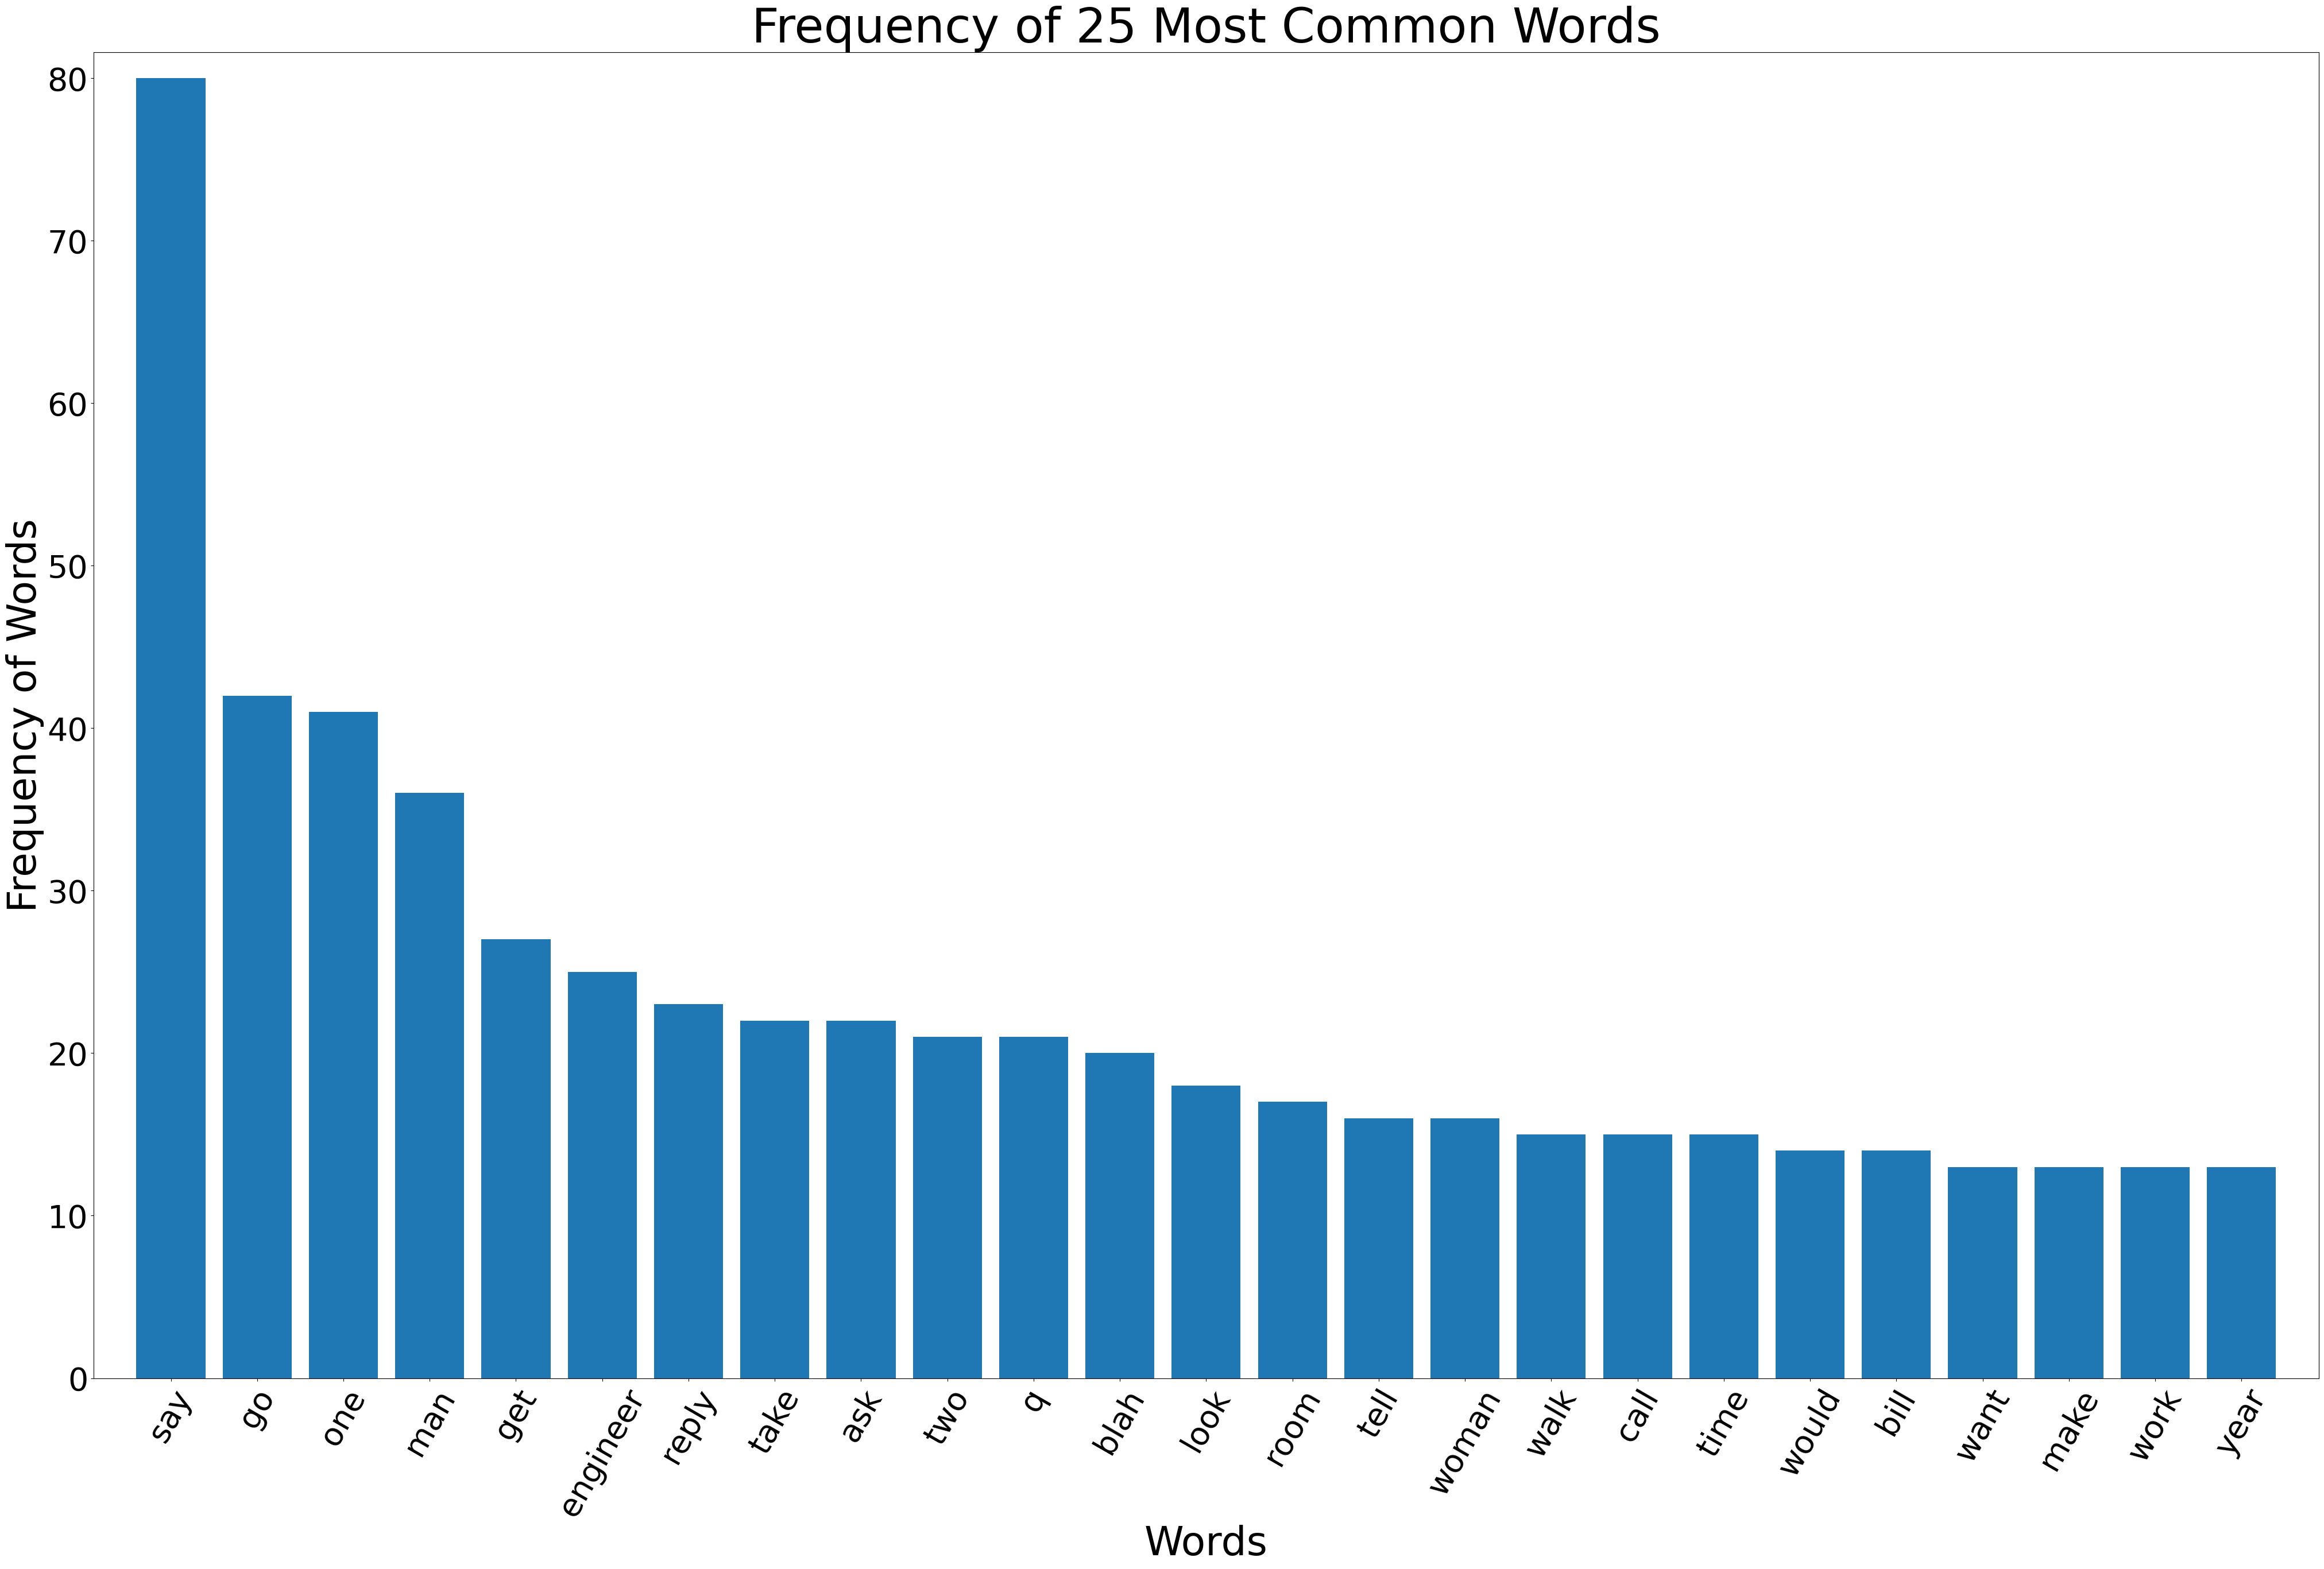

In [153]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [154]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)

In [155]:
tf = tf_vectorizer.fit_transform(df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names_out()

In [156]:
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,go,one,say
0,0,0,1
1,0,1,1
2,0,1,0
3,1,0,0
4,0,0,1
...,...,...,...
95,0,0,0
96,1,0,0
97,0,1,2
98,0,0,0


In [157]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)

In [158]:
no_top_words = 10

In [159]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
say one go
Topic 1:
one say go
Topic 2:
one say go
Topic 3:
one say go
Topic 4:
say one go
Topic 5:
one say go
Topic 6:
say go one
Topic 7:
go one say
Topic 8:
one say go
Topic 9:
one say go
